In [72]:
#Import c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import pairwise_distances_argmin
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [73]:
#2
# ƒê·ªçc d·ªØ li·ªáu
data = pd.read_csv("Mall_Customers.csv")

C√≥ t·ªïng 5 c·ªôt: ID kh√°ch h√†ng, gi·ªõi t√≠nh, thu nh·∫≠p h·∫±ng nƒÉm, ƒëi·ªÉm chi ti√™u

In [74]:
#3
# Xem th√¥ng tin t·ªïng quan
data.info()
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


B·ªè c·ªôt th·ª´a (Customer ID)

In [75]:
#4
data.drop('CustomerID', axis = 1, inplace = True)
data

Gender  Age  Annual Income (k$)  Spending Score (1-100)
0      Male   19                  15                      39
1      Male   21                  15                      81
2    Female   20                  16                       6
3    Female   23                  16                      77
4    Female   31                  17                      40
..      ...  ...                 ...                     ...
195  Female   35                 120                      79
196  Female   45                 126                      28
197    Male   32                 126                      74
198    Male   32                 137                      18
199    Male   30                 137                      83

[200 rows x 4 columns]

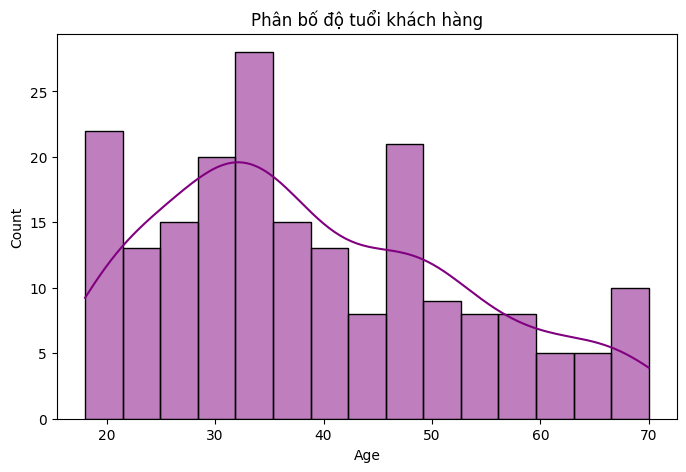

In [76]:
#5
# V·∫Ω histogram cho ƒë·ªô tu·ªïi
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], bins=15, kde=True, color='purple')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Ph√¢n b·ªë ƒë·ªô tu·ªïi kh√°ch h√†ng')
plt.show()

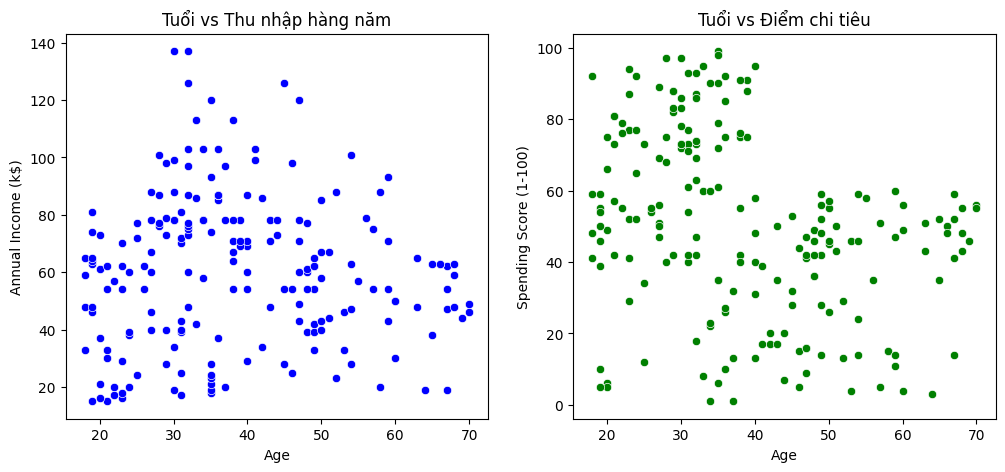

In [77]:
#6
# V·∫Ω bi·ªÉu ƒë·ªì ph√¢n t√°n cho c√°c c·∫∑p bi·∫øn
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Age', y='Annual Income (k$)', data=data, color='blue')
plt.title('Tu·ªïi vs Thu nh·∫≠p h√†ng nƒÉm')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=data, color='green')
plt.title('Tu·ªïi vs ƒêi·ªÉm chi ti√™u')
plt.show()


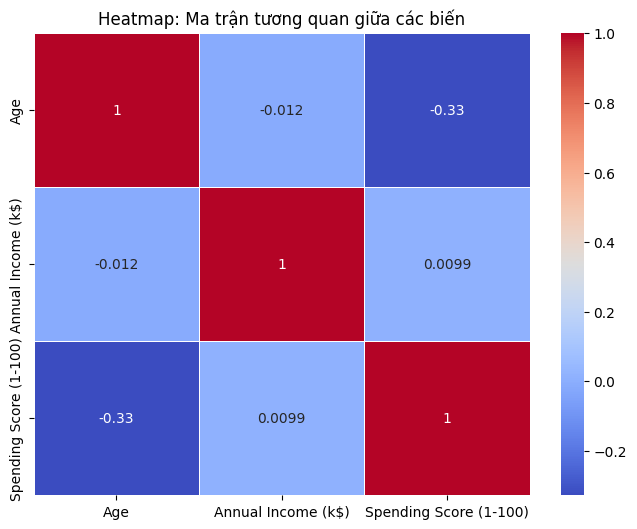

In [78]:
#7
# Heatmap ma tr·∫≠n t∆∞∆°ng quan
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap: Ma tr·∫≠n t∆∞∆°ng quan gi·ªØa c√°c bi·∫øn")
plt.show()

In [79]:
#8
# Ch·ªçn 2 ƒë·∫∑c tr∆∞ng: Age v√† Spending Score
X = data[["Age", "Spending Score (1-100)"]].values

In [80]:
#9
# Chu·∫©n h√≥a d·ªØ li·ªáu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [81]:
#10
# üîπ H√†m kh·ªüi t·∫°o K-Means++ ƒë·ªÉ ch·ªçn t√¢m c·ª•m ban ƒë·∫ßu ·ªïn ƒë·ªãnh
def kmeans_plus_plus(X, k, random_state=42):
    np.random.seed(random_state)
    centroids = [X[np.random.randint(len(X))]]  # Ch·ªçn t√¢m c·ª•m ƒë·∫ßu ti√™n ng·∫´u nhi√™n

    for _ in range(1, k):
        distances = np.min(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2) ** 2, axis=1)
        probs = distances / np.sum(distances)  # X√°c su·∫•t ch·ªçn t√¢m c·ª•m m·ªõi theo kho·∫£ng c√°ch | c√†ng xa c√†ng ch·ªçn
        new_centroid = X[np.random.choice(len(X), p=probs)]  # Ch·ªçn t√¢m m·ªõi
        centroids.append(new_centroid)

    return np.array(centroids)

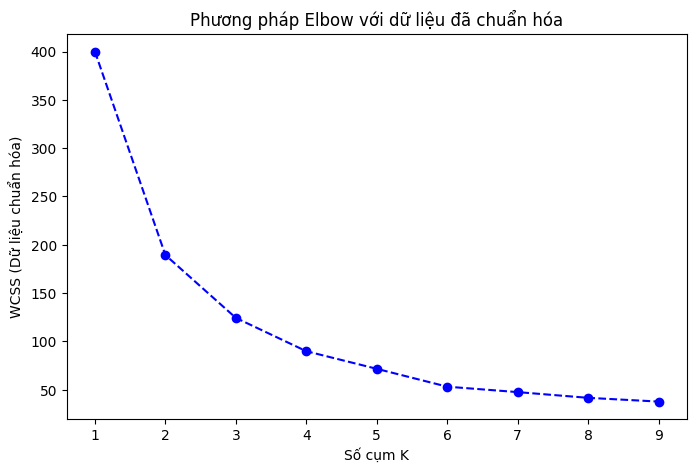

In [82]:
#11
# üîπ B∆Ø·ªöC 1: T√¨m s·ªë c·ª•m K t·ªëi ∆∞u b·∫±ng ph∆∞∆°ng ph√°p Elbow
wcss = []
for k in range(1, 10):
    centroids = kmeans_plus_plus(X_scaled, k)  # D√πng K-Means++ ƒë·ªÉ kh·ªüi t·∫°o t√¢m c·ª•m
    for _ in range(100):  # Gi·ªõi h·∫°n s·ªë v√≤ng l·∫∑p t·ªëi ƒëa ƒë·ªÉ h·ªôi t·ª•
        labels = pairwise_distances_argmin(X_scaled, centroids)

        new_centroids = []
        for j in range(k):
            if np.any(labels == j):  # Ki·ªÉm tra n·∫øu c·ª•m c√≥ ƒëi·ªÉm
                new_centroids.append(X_scaled[labels == j].mean(axis=0))
            else:
                new_centroids.append(X_scaled[np.random.randint(len(X_scaled))])  # Ch·ªçn ng·∫´u nhi√™n t·ª´ d·ªØ li·ªáu

        new_centroids = np.array(new_centroids)

        if np.allclose(centroids, new_centroids):  # Ki·ªÉm tra h·ªôi t·ª•
            break
        centroids = new_centroids

    # T√≠nh WCSS ƒë√∫ng
    wcss.append(np.sum((X_scaled - centroids[labels]) ** 2))
# üîπ V·∫Ω bi·ªÉu ƒë·ªì Elbow (D·ªØ li·ªáu ƒë√£ chu·∫©n h√≥a)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), wcss, marker='o', linestyle='--', color='blue')
plt.xlabel('S·ªë c·ª•m K')
plt.ylabel('WCSS (D·ªØ li·ªáu chu·∫©n h√≥a)')
plt.title('Ph∆∞∆°ng ph√°p Elbow v·ªõi d·ªØ li·ªáu ƒë√£ chu·∫©n h√≥a')
plt.show()

In [83]:
#12
# üîπ B∆Ø·ªöC 2: Kh·ªüi t·∫°o K-Means++ (Gi·∫£ s·ª≠ K = 6)
K = 6
np.random.seed(42)
centroids = [X_scaled[np.random.randint(X_scaled.shape[0])]]  # Ch·ªçn ng·∫´u nhi√™n t√¢m c·ª•m ƒë·∫ßu ti√™n
# Ch·ªçn K-1 t√¢m c·ª•m c√≤n l·∫°i d·ª±a tr√™n kho·∫£ng c√°ch
for _ in range(1, K):
    distances = np.min(np.linalg.norm(X_scaled[:, np.newaxis] - centroids, axis=2) ** 2, axis=1)
    probs = distances / np.sum(distances)
    new_centroid = X_scaled[np.random.choice(X_scaled.shape[0], p=probs)]
    centroids.append(new_centroid)
centroids = np.array(centroids)

In [84]:
#13
# üîπ B∆Ø·ªöC 3: Ch·∫°y K-Means th·ªß c√¥ng
max_iter = 100
for _ in range(max_iter):
    labels = pairwise_distances_argmin(X_scaled, centroids)  # G√°n ƒëi·ªÉm v√†o c·ª•m g·∫ßn nh·∫•t
    new_centroids = np.array([X_scaled[labels == j].mean(axis=0) for j in range(K)])

    # Ki·ªÉm tra h·ªôi t·ª• (n·∫øu t√¢m c·ª•m kh√¥ng thay ƒë·ªïi th√¨ d·ª´ng)
    if np.all(centroids == new_centroids):
        break
    centroids = new_centroids

In [85]:
#14
# üîπ B∆Ø·ªöC 4: Kh·ª≠ chu·∫©n h√≥a (t√¢m c·ª•m v√† d·ªØ li·ªáu v·ªÅ d·∫°ng ban ƒë·∫ßu)
centroids_original = scaler.inverse_transform(centroids)

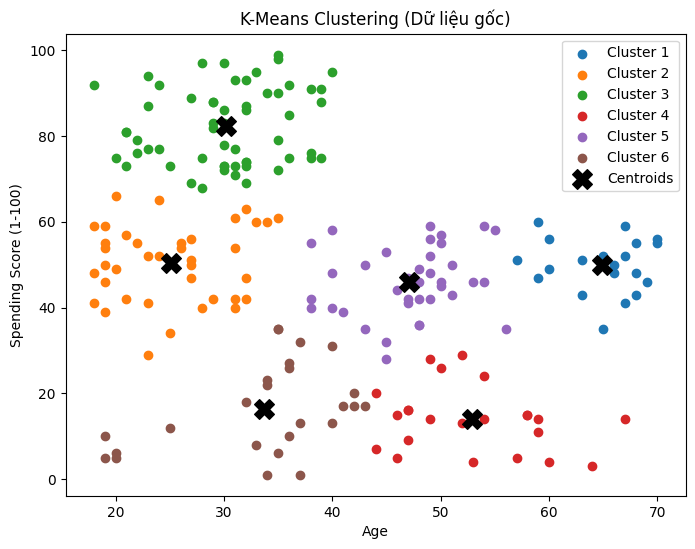

In [86]:
#15
# üîπ B∆Ø·ªöC 5: V·∫Ω k·∫øt qu·∫£ v·ªõi d·ªØ li·ªáu ch∆∞a chu·∫©n h√≥a
plt.figure(figsize=(8, 6))
for i in range(K):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f'Cluster {i+1}')
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], c='black', marker='X', s=200, label='Centroids')
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.title("K-Means Clustering (D·ªØ li·ªáu g·ªëc)")
plt.legend()
plt.show()

In [87]:
#16
# üîπ B∆Ø·ªöC 6: T√≠nh Silhouette Score
sil_score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {sil_score:.1f}")

Silhouette Score: 0.5


In [88]:
#17
# üîπ B∆Ø·ªöC 7: T√¨m c·ª•m kh√°ch h√†ng ti·ªÅm nƒÉng nh·∫•t (Chi ti√™u cao nh·∫•t)
best_cluster = np.argmax(centroids_original[:, 1])  # Ch·ªçn c·ª•m c√≥ Spending Score cao nh·∫•t
potential_customers = data.iloc[labels == best_cluster]  # Ch·ªçn ƒë√∫ng kh√°ch h√†ng t·ª´ DataFrame g·ªëc
# Ch·ªâ l·∫•y c·ªôt 'Age' v√† 'Spending Score'
potential_customers_array = potential_customers[["Age", "Spending Score (1-100)"]].to_numpy()
# T√¢m c·ª•m v√† b√°n k√≠nh d·ª±a tr√™n d·ªØ li·ªáu g·ªëc
cluster_center_goc = centroids_original[best_cluster]
cluster_radius = np.max(np.linalg.norm(potential_customers_array - cluster_center_goc, axis=1))

In [89]:
#18
# Ch·ªâ l·∫•y c·ªôt 'Age' v√† 'Spending Score'
potential_customers_array = potential_customers[["Age", "Spending Score (1-100)"]].to_numpy()

In [90]:
#19
# T√¢m c·ª•m v√† b√°n k√≠nh d·ª±a tr√™n d·ªØ li·ªáu g·ªëc
cluster_center_goc = centroids_original[best_cluster]
cluster_radius = np.max(np.linalg.norm(potential_customers_array - cluster_center_goc, axis=1))

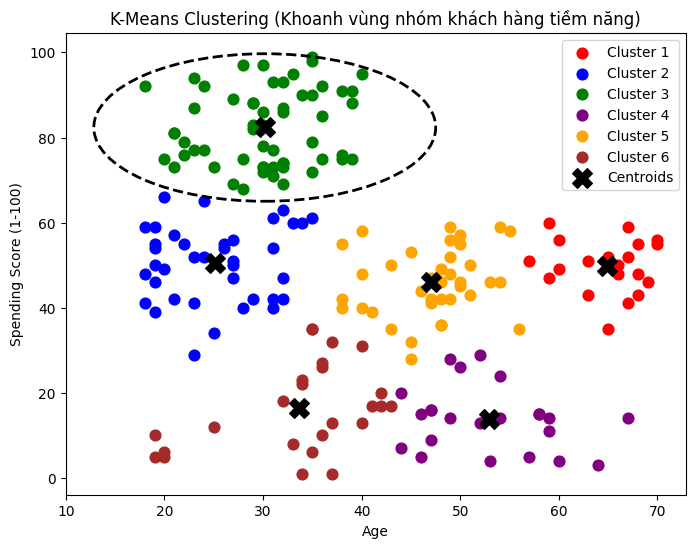

In [91]:
#20
# üîπ B∆Ø·ªöC 8: V·∫Ω k·∫øt qu·∫£ v√† khoanh tr√≤n c·ª•m ti·ªÅm nƒÉng
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown']
for i in range(K):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], c=colors[i], s=60, label=f'Cluster {i+1}')
# V·∫Ω h√¨nh tr√≤n bao quanh c·ª•m ti·ªÅm nƒÉng (D√πng cluster_center_goc)
circle = plt.Circle(cluster_center_goc, cluster_radius, color='black', fill=False, linewidth=2, linestyle="dashed")
plt.gca().add_patch(circle)
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], c='black', marker='X', s=200, label='Centroids')
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.title("K-Means Clustering (Khoanh v√πng nh√≥m kh√°ch h√†ng ti·ªÅm nƒÉng)")
plt.legend()
plt.show()

In [92]:
#21 
# üîπ B∆Ø·ªöC 9: Th·ªëng k√™ ƒë·∫∑c tr∆∞ng c·ªßa nh√≥m kh√°ch h√†ng ti·ªÅm nƒÉng
print("\nüìå Th·ªëng k√™ v·ªÅ nh√≥m kh√°ch h√†ng ti·ªÅm nƒÉng nh·∫•t:")
print(potential_customers.describe())

# Hi·ªÉn th·ªã danh s√°ch kh√°ch h√†ng ti·ªÅm nƒÉng
print("\nüìå Danh s√°ch kh√°ch h√†ng ti·ªÅm nƒÉng:")
print(potential_customers)


üìå Th·ªëng k√™ v·ªÅ nh√≥m kh√°ch h√†ng ti·ªÅm nƒÉng nh·∫•t:
             Age  Annual Income (k$)  Spending Score (1-100)
count  57.000000           57.000000               57.000000
mean   30.175439           66.070175               82.350877
std     5.535995           32.405830                8.913255
min    18.000000           15.000000               68.000000
25%    27.000000           33.000000               75.000000
50%    30.000000           75.000000               81.000000
75%    35.000000           87.000000               90.000000
max    40.000000          137.000000               99.000000

üìå Danh s√°ch kh√°ch h√†ng ti·ªÅm nƒÉng:
     Gender  Age  Annual Income (k$)  Spending Score (1-100)
1      Male   21                  15                      81
3    Female   23                  16                      77
5    Female   22                  17                      76
7    Female   23                  18                      94
9    Female   30                  19   